`63070501061 S.RAKNA`

> 15 points. 1 hour.

# Single Layer Perceptron on Logic Gate
Show that the `OR`, `AND` <u>will work</u> for a **single layer perceptron**, but the `XOR` <u>will not</u> find a solution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class SingleLayerPerceptron:
    '''
    This class implements a single layer perceptron. Follows from the example in the lecture slides.

    Training Procedure: Find w's.
    1. Assign any value to the weight vector, w.
    2. Using the weight vector, w and the next training data, x, Compute the output of the perceptron, V.
        V = W1*I1 + W2*I2 + ... + WN*IN + bias*1
    3. If V is greater than 0, return 1, otherwise return 0.
    4. If the computed output, C, is not the same as the correct output, O, Adjust the weight vector, w. Using Gradient Descent.
        V = W1*I1 + W2*I2 + ... + WN*IN + bias*1
        C = tau(V) = tau(W1*I1 + W2*I2 + ... + WN*IN + bias*1)
        E = sum((Ci - Oi)^2) = sum((tau(Vi) - Oi)^2)

        W1 -= I1 * (C - O) * learning_rate
        W2 -= I2 * (C - O) * learning_rate
        ...
        WN -= IN * (C - O) * learning_rate
        bias -= 1 * (C - O) * learning_rate

    5. Repeat steps 2-4.
        If you run out of training items, start with the first training item.
        Stop repeating if no weight changes through 1 complete training cycle.


    Example for Logic Gate: AND
    Training Data:
        I1  I2  O
        0   0   0
        0   1   0
        1   0   0
        1   1   1

        Expected Weights:
            W1 = 1
            W2 = 1
            threshold = 1.5

            W1*I1 + W2*I2 >= threshold
    '''

    def __init__(self, num_inputs, learning_rate=1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(num_inputs)
        self.threshold = 0
        self.errors = []

    def activation(self, summation):
        '''
        Returns the activation of the perceptron.
        '''
        return 1 if summation > 0 else 0

    def predict(self, inputs):
        '''
        Returns the output of the perceptron for the given inputs.
        '''
        summation = np.dot(inputs, self.weights) + self.threshold
        return self.activation(summation)

    def train(self, training_inputs, labels):
        '''
        Trains the perceptron using the given training data.
        '''
        for _ in range(self.epochs):
            error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error += (prediction - label)**2
                self.weights -= self.learning_rate * \
                    (prediction - label) * inputs
                self.threshold -= self.learning_rate * (prediction - label)
            self.errors.append(error)
        return self

    def plot_errors(self):
        '''
        Plots the error for each epoch.
        '''
        plt.plot(range(1, len(self.errors) + 1), self.errors, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Sum-squared-error')
        plt.show()


In [3]:
I = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


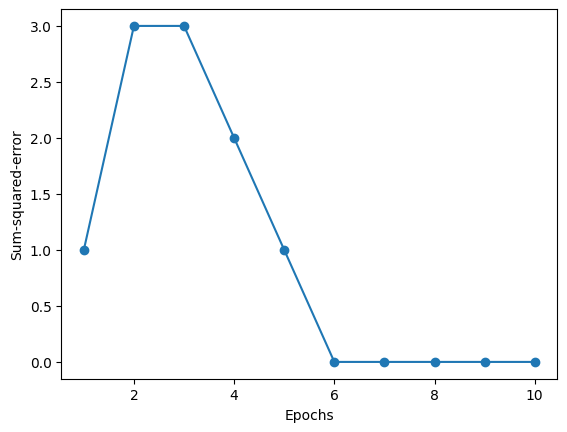

AND gate
Weights: [2. 1.]
Threshold: -2
Predictions:
[0 0]: 0
[0 1]: 0
[1 0]: 0
[1 1]: 1


In [4]:
# AND gate
O_AND = np.array([0, 0, 0, 1])

slp_AND = SingleLayerPerceptron(2)
slp_AND.train(I, O_AND)
slp_AND.plot_errors()

print('AND gate')
print('Weights: {}'.format(slp_AND.weights))
print('Threshold: {}'.format(slp_AND.threshold))
print('Predictions:')
for i in I:
    print('{}: {}'.format(i, slp_AND.predict(i)))


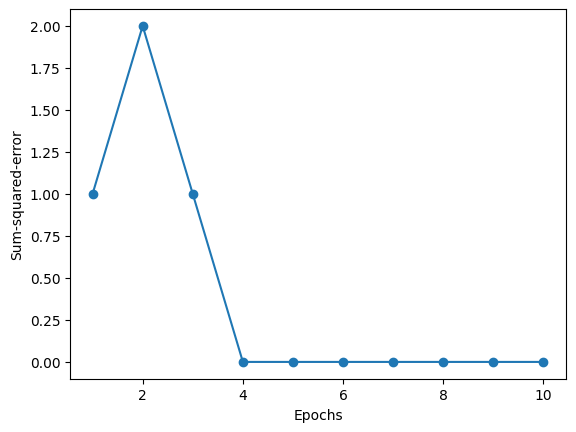

OR gate
Weights: [1. 1.]
Threshold: 0
Predictions:
[0 0]: 0
[0 1]: 1
[1 0]: 1
[1 1]: 1


In [5]:
# OR gate
O_OR = np.array([0, 1, 1, 1])

slp_OR = SingleLayerPerceptron(2)
slp_OR.train(I, O_OR)
slp_OR.plot_errors()

print('OR gate')
print('Weights: {}'.format(slp_OR.weights))
print('Threshold: {}'.format(slp_OR.threshold))
print('Predictions:')
for i in I:
    print('{}: {}'.format(i, slp_OR.predict(i)))

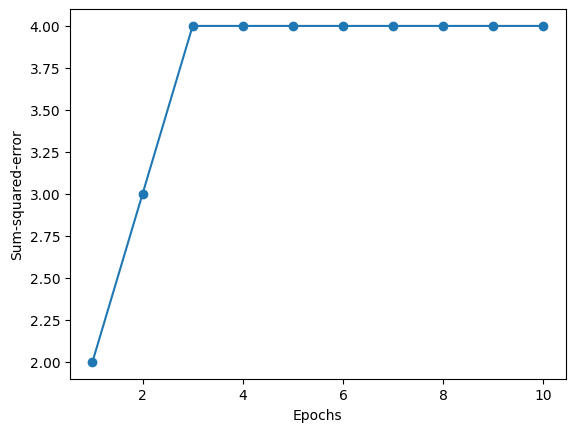

XOR gate
Weights: [-1.  0.]
Threshold: 1
Predictions:
[0 0]: 1
[0 1]: 1
[1 0]: 0
[1 1]: 0


In [6]:
# XOR gate
O_XOR = np.array([0, 1, 1, 0])

slp_XOR = SingleLayerPerceptron(2)
slp_XOR.train(I, O_XOR)
slp_XOR.plot_errors()

print('XOR gate')
print('Weights: {}'.format(slp_XOR.weights))
print('Threshold: {}'.format(slp_XOR.threshold))
print('Predictions:')
for i in I:
    print('{}: {}'.format(i, slp_XOR.predict(i)))